In [143]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# data info
df = pd.read_csv('/content/drive/MyDrive/dirty_cafe_sales.csv')

## Data Cleaning

In [146]:
# check nulls each column has
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


- Transaction ID: Fully complete -> keep
- Location: Very high missing -> drop
- Other columns: Can be computed or autofilled

Replace invalid entries like "ERROR" and "UNKNOWN" with appropriate values

In [147]:
df.replace(['UNKNOWN', 'ERROR', 'None'], np.nan, inplace=True)

Location: Very high missing -> drop

In [148]:
# drop Location column
df.drop(columns=['Location'], inplace=True)

In [149]:
# Location column has been removed
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Transaction Date'],
      dtype='object')

Item: Moderate missing -> forward fill

In [150]:
# fill missing text fields in Item column
df['Item'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-150-986992668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-150-986992668.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Item'].fillna(method='ffill', inplace=True)


Quantity: Low missing -> auto fill with Mode value

In [151]:
# fill missing text fields in Quantity column
df['Quantity'].fillna(df['Quantity'].mode()[0], inplace=True)

/tmp/ipython-input-151-3352745164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].mode()[0], inplace=True)


Price Per Unit: Low missing -> auto fill with median value

In [152]:
# fill missing text fields in Price Per Unit column
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)

/tmp/ipython-input-152-3292677978.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)


Total Spent: Low missing -> Quantity * Price Per Unit

In [154]:
# fill missing text fields in Total Spent column
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Total Spent'] = df['Total Spent'].fillna(df['Quantity'] * df['Price Per Unit'])

Payment Method: High missing -> auto fill with Mode value



In [155]:
# fill missing text fields in Payment Method column
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)

/tmp/ipython-input-155-2834085330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)


Transaction Date: Low missing -> back fill

In [156]:
df['Transaction Date'].fillna(method='bfill', inplace=True)

/tmp/ipython-input-156-2615690322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Date'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-156-2615690322.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Transaction Date'].fillna(method='bfill', inplace=True)


In [157]:
# check nulls post-update
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Transaction Date,0


In [158]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Kz_KhxvnssUWZ0iQSJbwC4MWe8csf46eqttt80A_nak/edit#gid=0


## EDA

In [160]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.00000,10000.000000
mean,3.122900,2.95265,8.942650
std,1.447206,1.24396,6.006896
min,1.000000,1.00000,1.000000
25%,2.000000,2.00000,4.000000
50%,3.000000,3.00000,8.000000
75%,4.000000,4.00000,12.000000
max,5.000000,5.00000,25.000000


In [161]:
# most popular items
df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

,Total Spent
Item,
Salad,18312.5
Sandwich,14950.0
Smoothie,14483.0
Juice,11727.0
Cake,11363.0
Coffee,8184.5
Tea,6111.5
Cookie,4295.0


## Data Visualization

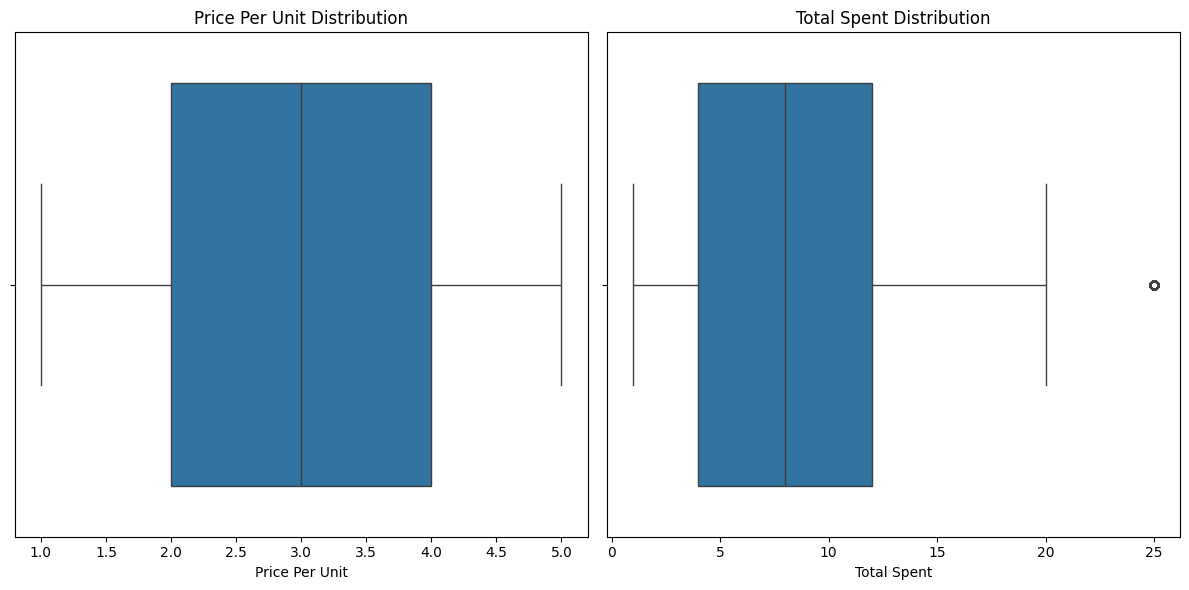

In [174]:
# detect outliers using IQR method
plt.figure(figsize=(12,6))

# boxplot cho Price Per Unit
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price Per Unit'])
plt.title('Price Per Unit Distribution')

# boxplot cho Total Spent
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total Spent'])
plt.title('Total Spent Distribution')

plt.tight_layout()
plt.show()
# There is a clear outlier in the Total Spent distribution (around 25).
# Both distributions appear to be fairly balanced,
# but a larger sample size is needed to draw more accurate conclusions.

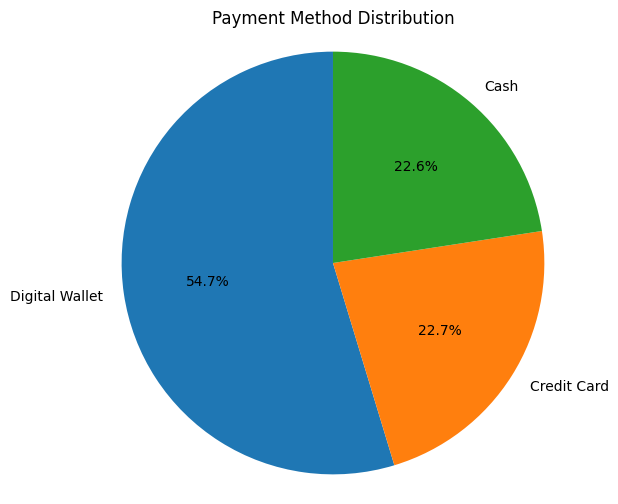

In [176]:
# proportion of each payment method
payment_counts = df['Payment Method'].value_counts(dropna=True)

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show() # Digital Wallet is the most used method (~54.7%)